# CAPESTONE PROJECT - WINE QUALITY PREDICTION
### BY DINESH SONAWANE

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the file

In [2]:
raw_data = pd.read_csv('QualityPrediction.csv')
raw_data.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
raw_data.shape
# Observations:
# Raw data has 1599 rows and 12 columns

(1599, 12)

#### Basic information of data

In [4]:
raw_data.info()
# Observations:
# 1. There are no null values present in the data
# 2. All the columns contains float data except quality column which contains int data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
raw_data.duplicated().sum()
# Observations:
# 1. Raw data has 240 duplicate rows and those can be removed from the raw data

240

#### Removing duplicate data 

In [6]:
data_removed_duplicates = raw_data.copy()                                       # Created copy of data to keep original data intact
data_removed_duplicates.drop_duplicates(ignore_index=True, inplace = True)      # Removed duplicate rows and reset index
data_removed_duplicates.shape

(1359, 12)

In [7]:
data_removed_duplicates.duplicated().sum()                              # Verification of removal of duplicate rows

0

#### Calculate Skewness

In [8]:
col_name_list = list(data_removed_duplicates.columns) # Create list of columns
col_name_list.remove('quality') # Remove target variable from the list as those will not be treated for outlier
col_name_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [9]:
#Skew = 3 * (Mean – Median) / Standard Deviation
col_with_ND = []                  # Create empty list to capture columns having fair normal distribution
col_with_Non_ND = []              # Create empty list to capture columns having non-normal distribution (skewed data)
def skewness_calculation(col):    # Define function to calculate skewness
    mean = data_removed_duplicates[col].mean()
    med = data_removed_duplicates[col].median()
    sd = data_removed_duplicates[col].std()
    skew = 3 * (mean - med) / sd
    if -0.5<skew<0.5:
        print(f'{col} --> fairly symmetrical -->', skew)
        col_with_ND.append(col)
    elif -1<skew<-0.5 or 0.5<skew<1:
        print(f'{col} --> moderatly skewed -->', skew)
        col_with_Non_ND.append(col)
    else:
        print(f'{col} --> highly skewed -->', skew)
        col_with_Non_ND.append(col)

for i in col_name_list:
    skewness_calculation(i)

print(col_with_ND, end = '\n\n')
print(col_with_Non_ND)

fixed acidity --> moderatly skewed --> 0.7091510117840668
volatile acidity --> fairly symmetrical --> 0.15534320274550958
citric acid --> fairly symmetrical --> 0.18921165135415827
residual sugar --> moderatly skewed --> 0.7174360757368301
chlorides --> moderatly skewed --> 0.5543256410525922
free sulfur dioxide --> moderatly skewed --> 0.5436742382403393
total sulfur dioxide --> moderatly skewed --> 0.7925399734948381
density --> fairly symmetrical --> 0.014363005528780197
pH --> fairly symmetrical --> -0.004129204281992391
sulphates --> moderatly skewed --> 0.6803592067348918
alcohol --> moderatly skewed --> 0.6440888433061316
['volatile acidity', 'citric acid', 'density', 'pH']

['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']


#### Detecting outliers, use IQR method for non-normal ditribution of data

In [10]:
data_IQR_treated = data_removed_duplicates.copy() # Create copy of data without duplicates to treate outlier

<AxesSubplot:ylabel='total sulfur dioxide'>

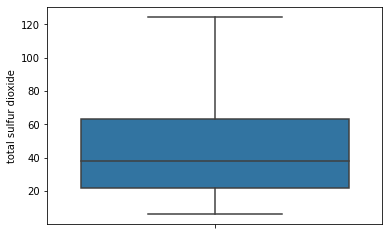

In [11]:
def IQR_outlier_treatment(col_name):     # Define function to replace outlier by IQR upper and lower bounds
    Q1 = data_IQR_treated[col_name].quantile(0.25)
    Q3 = data_IQR_treated[col_name].quantile(0.75)
    IQR = Q3 - Q1
    Upper = Q3 + 1.5*IQR
    Lower = Q1 - 1.5*IQR
    return data_IQR_treated[col_name].clip(Upper,Lower, inplace = True)

for i in col_with_Non_ND:
    IQR_outlier_treatment(i)   # Pass each column to function 

sns.boxplot(data = data_IQR_treated, y =  'total sulfur dioxide') # Draw boxplot manually for each column to ensure no outliers

#### Detecting outliers, use Z-Score method for normal ditribution of data

In [12]:
data_outlier_treated = data_IQR_treated.copy() 
def Z_Score_Outlier_treatment(col):            # define function to treate normal distribution data with Z-score method
    mean = data_outlier_treated[col].mean()
    sd = data_outlier_treated[col].std()
    upper_limit = mean + 3*sd
    lower_limit = mean - 3*sd
    return data_outlier_treated[col].clip(upper_limit, lower_limit, inplace = True)

for i in col_with_ND:
    Z_Score_Outlier_treatment(i)

data_outlier_treated                       # Final data without any outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
data_outlier_treated.describe()  
# Observatio - Because of outlier removal standard deviation is reduced to great extend

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.284069,0.528394,0.272229,2.324099,0.081323,15.714496,46.092715,0.996707,3.309271,0.649963,10.428734,5.623252
std,1.658319,0.178863,0.195187,0.607558,0.018486,9.852641,30.877994,0.001850,0.152629,0.137403,1.070647,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.038500,1.000000,6.000000,0.991102,2.844678,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,12.350000,1.078572,0.858942,3.650000,0.122500,42.000000,124.500000,1.002316,3.774896,1.000000,13.500000,8.000000


In [14]:
data = data_outlier_treated.copy()
data.nunique()   #Check number of unique values in each column

fixed acidity            78
volatile acidity        136
citric acid              80
residual sugar           39
chlorides                85
free sulfur dioxide      45
total sulfur dioxide    116
density                 427
pH                       86
sulphates                63
alcohol                  61
quality                   6
dtype: int64

In [157]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

#### Check of Multicollinearity

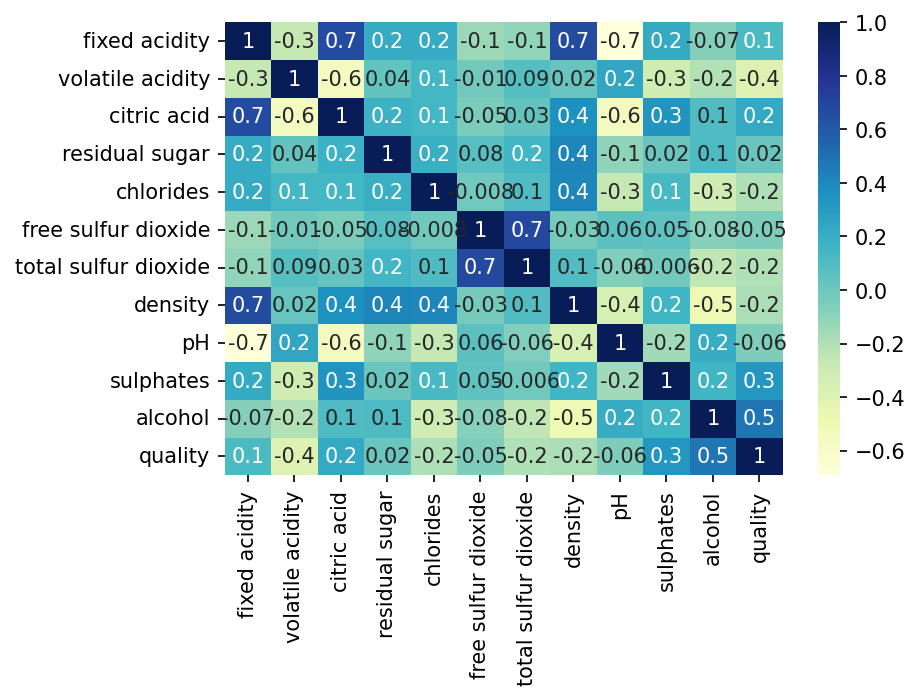

In [16]:
plt.figure(figsize = (6,4), dpi = 150)
heat_map_plot = sns.heatmap(data.corr(),fmt = '.1g',cmap='YlGnBu',annot=True)
# Obervations:
# 1. alcohol and sulphates features are highly corelated with quality 
# 2. PH seems to have lowest corelation with quality

#### Evaluate VIF to get better insight on multicollinearity

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data_new = data.drop(columns=['quality'])
vif = pd.DataFrame()
vif['fetures'] = data_new.columns
vif['VIF'] = [variance_inflation_factor(data_new,i) for i in range(data_new.shape[1])]
vif

,fetures,VIF
0,fixed acidity,78.586525
1,volatile acidity,17.058464
2,citric acid,8.693938
3,residual sugar,18.699954
4,chlorides,26.921681
5,free sulfur dioxide,7.201375
6,total sulfur dioxide,7.517918
7,density,1517.886646
8,pH,1077.470517
9,sulphates,28.805170


#### For all the features VIF values are far greater than 5, so it means that mostly all the features has relationship with other features.
<font color = 'red'> NOT SURE WHAT CAN BE DONE IN SUCH SCENARIO </font>

In [18]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# LOGISTIC REGRESSION

#### Import Libraries

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [20]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [21]:
x = data.iloc[:,:11].values
y = data.iloc[:,-1:].values

#### Train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/3, random_state=1)

In [23]:
print(x_train.shape)
print(x_test.shape)
# data divided as 1/3rd to test and 2/3rd to train

(906, 11)
(453, 11)


#### Feature Scaling

In [24]:
# Scaling the independent variable
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(x_train)
X_test = standard_scaler.transform(x_test)
# Whenever statistical parameters are generated from train data, same are used for test data

#### Instantiating and fitting the model

In [25]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

#### Prediction for test data

In [26]:
y_predict = log_reg.predict(X_test)

In [27]:
diff = pd.DataFrame(y_test - y_predict.reshape(-1,1))
diff.value_counts()

 0    248
 1    108
-1     75
-2     11
 2     10
-3      1
dtype: int64

#### Plot Confusion Matrix

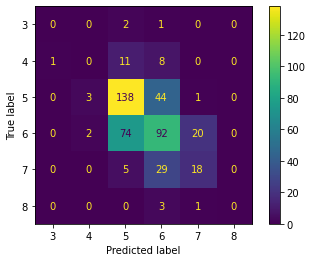

In [28]:
conf_matrix = plot_confusion_matrix(log_reg, X_test, y_test)

In [136]:
cr_lr = classification_report(y_test, y_predict.reshape(-1,1), labels= data['quality'].unique())
print(cr_lr)

              precision    recall  f1-score   support

           5       0.60      0.74      0.66       186
           6       0.52      0.49      0.50       188
           7       0.45      0.35      0.39        52
           4       0.00      0.00      0.00        20
           8       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

    accuracy                           0.55       453
   macro avg       0.26      0.26      0.26       453
weighted avg       0.51      0.55      0.53       453



In [30]:
y_pred_proba = log_reg.predict_proba(x_test)

In [31]:
y_pred_proba_0 = y_pred_proba[::,3].reshape(-1,1)
print(y_test.shape)
print(y_pred_proba[::,3].reshape(-1,1).shape)


(453, 1)
(453, 1)


In [32]:
from sklearn import metrics
# fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba_0)

<font color = 'red'> ROC CURVE AND AUC SCORE CANNOT BE CALCULATED FOR MULTICLSSIFICATION PROBLEM </font>

#### OBERVATION FROM LOGISTIC REGRESSION
- Recall for class 5 is better than rest of the classes, but for all other clasess recall is very low
- Overall accuracy is very low
- Logistic regression may not be appropriate algorithem for given data set
- Accuracy was calulcated as 96% when 'free sulphor dioxide' coloumn was dropped from dataset. Logic was free sulphor would have been considered under total sulohor dioxide coloumn, but there is no statistical evidence to drop 'free sulphor dioxide' col.

# DECISION TREE (DT) CLASSIFIER MODEL

#### Import Libraries

In [33]:
from sklearn.tree import DecisionTreeClassifier
print(x.shape)  # Predictor variable
print(y.shape)  # Target Variable

(1359, 11)
(1359, 1)


In [34]:
print(x_train.shape)   # Predictor variable used for training the model
print(y_train.shape)   # Target variable used for training the model
print(x_test.shape)    # Predictor variable used for testing the model
print(y_test.shape)    # Target variable used for testing the model

# All above datasets are without any scalar techniques

(906, 11)
(906, 1)
(453, 11)
(453, 1)


In [35]:
dt_cls = DecisionTreeClassifier(random_state=1)

#### Hypertuning of parameters

In [36]:
from sklearn.model_selection import GridSearchCV
parameter_dict = {'max_depth' : [3,4,5,6,7,8],
                  'max_features' : ['auto','sqrt', 'log2'],
                  'criterion' : ['gini', 'entropy']}

In [37]:
dt_gscv = GridSearchCV(dt_cls, cv=5, param_grid = parameter_dict, verbose=3, n_jobs=-1)
dt_gscv.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=3)

In [38]:
print('Best parameters using GridSerachCV are:', dt_gscv.best_params_)

Best parameters using GridSerachCV are: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}


#### Fit and Predict 

In [39]:
dt_cls.set_params(criterion= 'gini', max_depth= 6, max_features= 'auto')

DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=1)

In [40]:
dt_cls.fit(x_train, y_train)
dt_y_pred = dt_cls.predict(x_test)

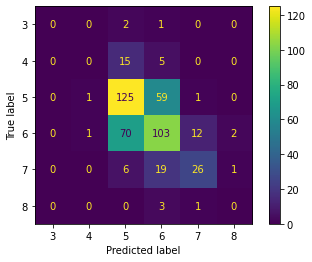

In [41]:
plot_confusion_matrix(dt_cls, x_test, y_test)

In [138]:
cr_dt = classification_report(y_test,dt_y_pred, labels=data['quality'].unique())
print(cr_dt)

              precision    recall  f1-score   support

           5       0.57      0.67      0.62       186
           6       0.54      0.55      0.54       188
           7       0.65      0.50      0.57        52
           4       0.00      0.00      0.00        20
           8       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

    accuracy                           0.56       453
   macro avg       0.29      0.29      0.29       453
weighted avg       0.54      0.56      0.55       453



#### Plotting of decision tree

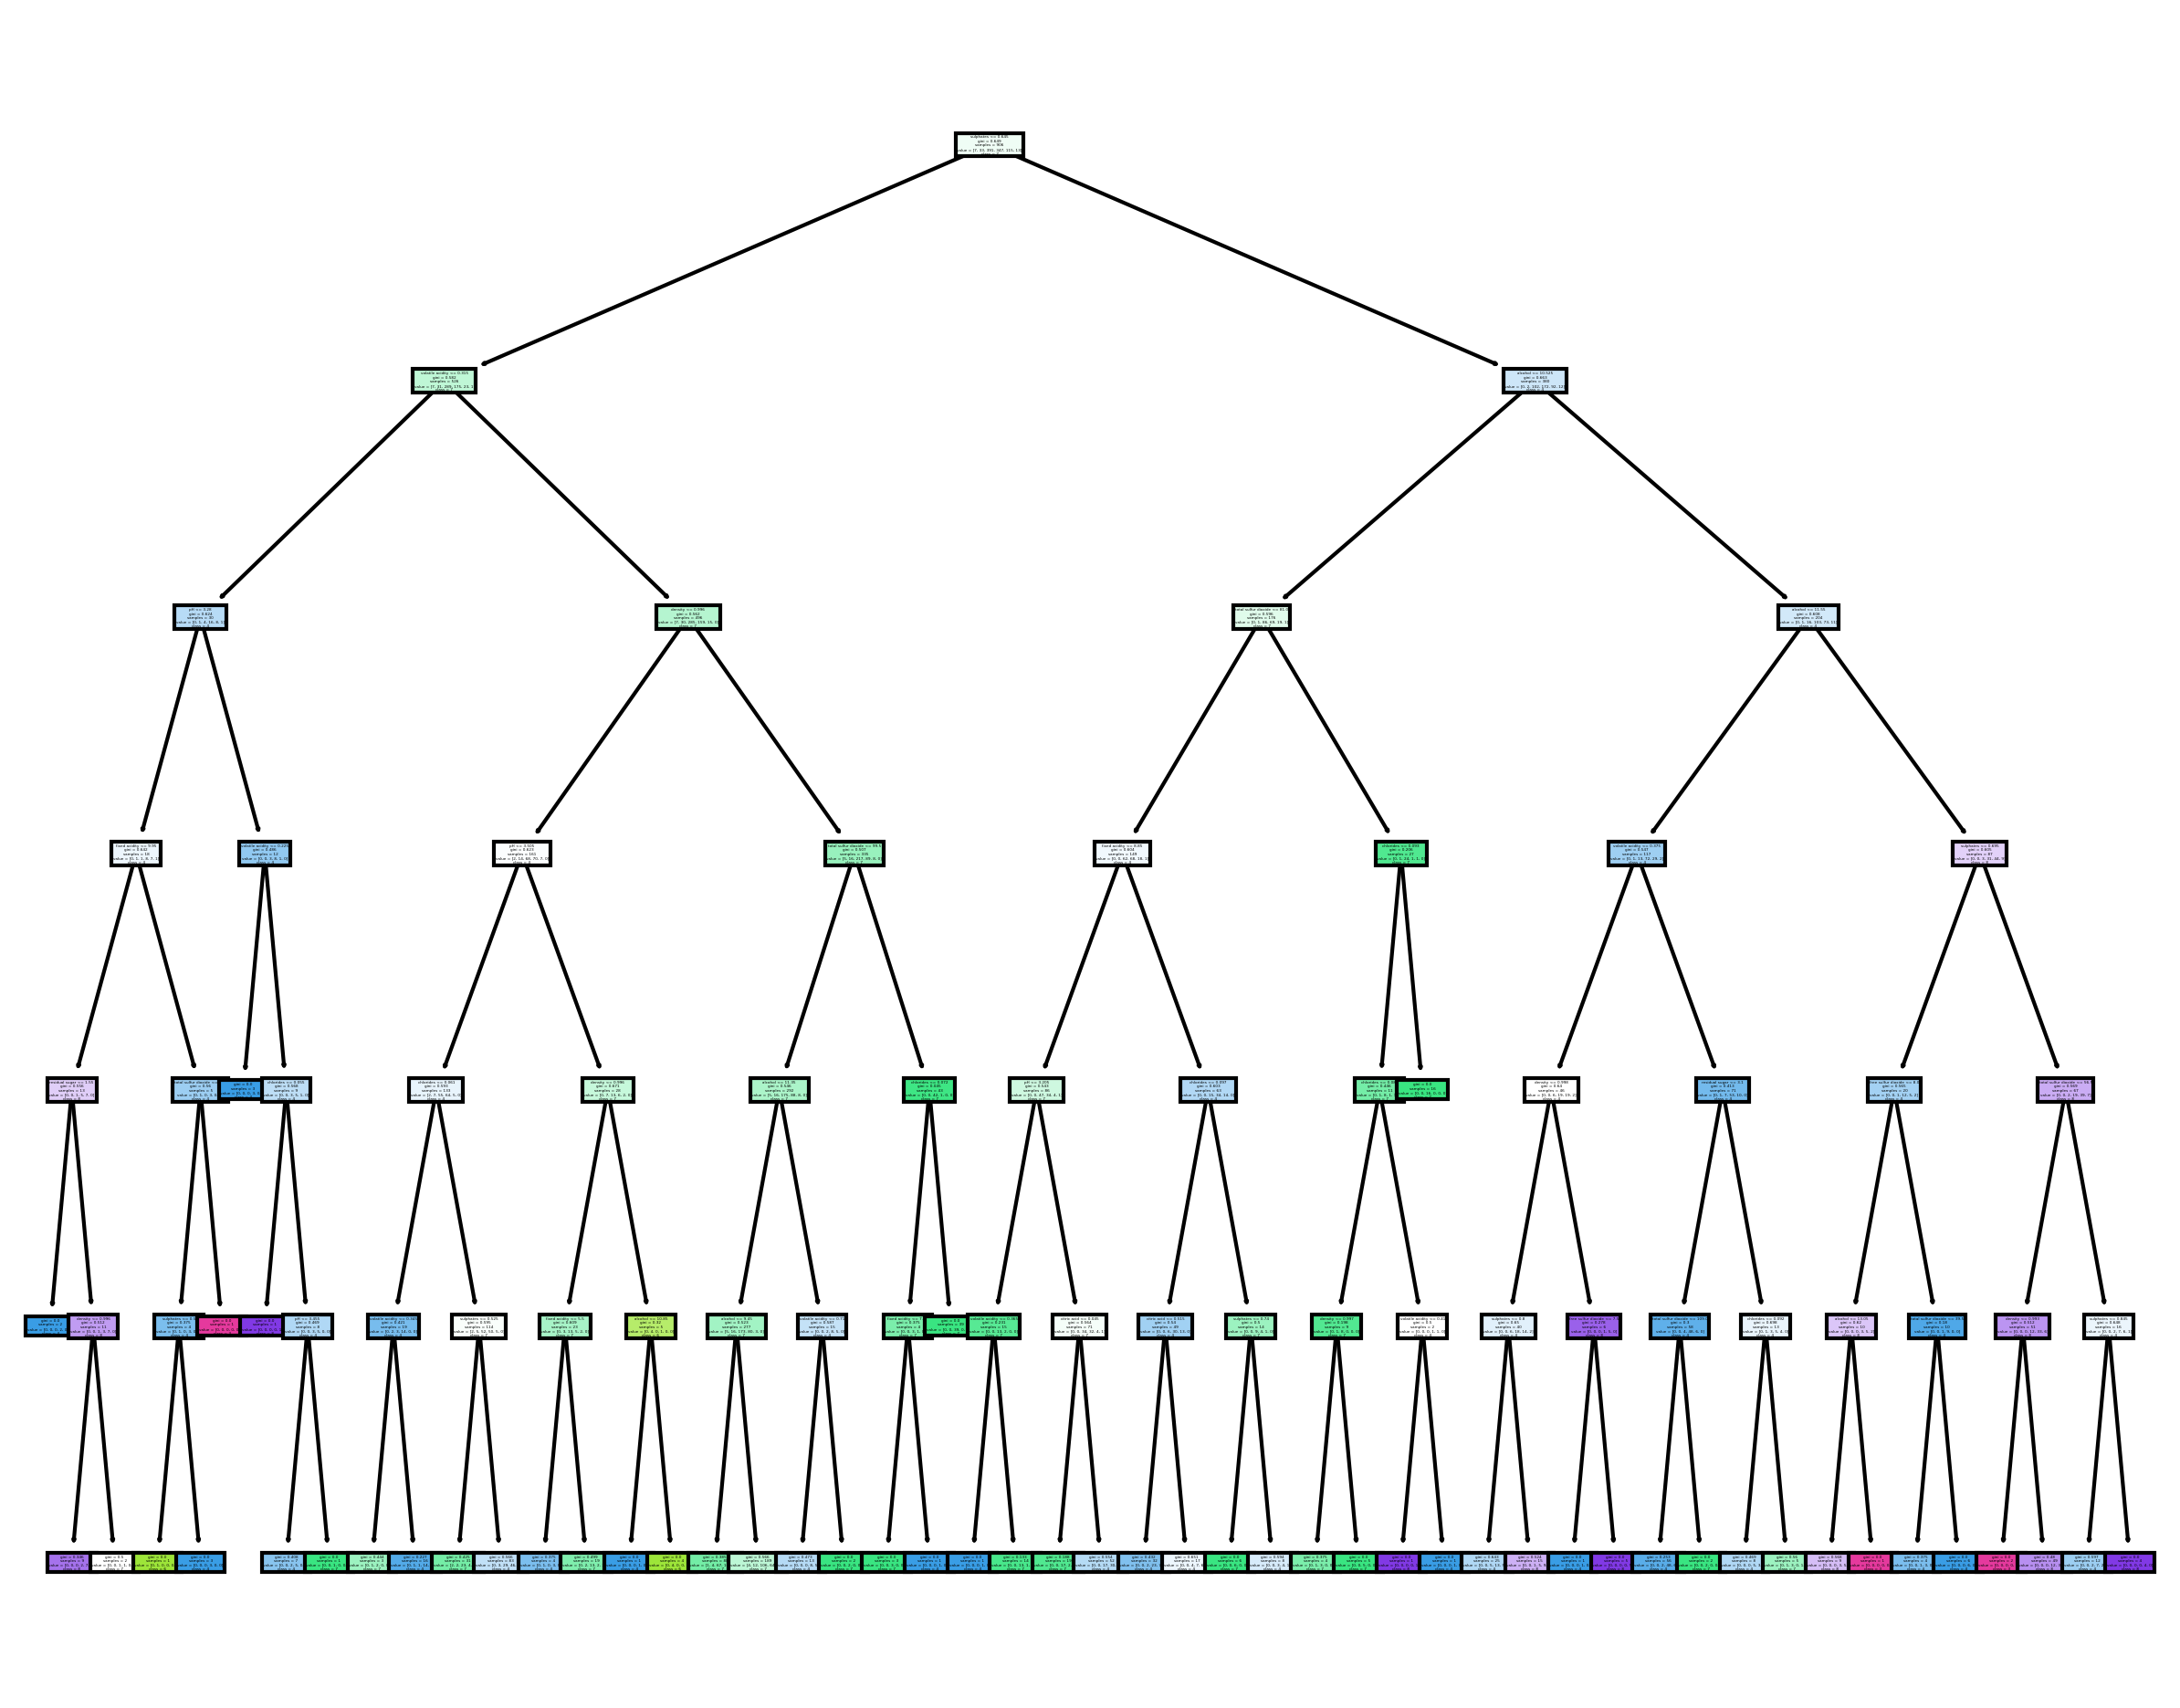

In [43]:
from sklearn import tree
df = data.drop(columns='quality')
fn = list(df.columns)
lst = list(data['quality'].unique())
cn = [str(i) for i in lst]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,8), dpi = 300 )
tree.plot_tree(dt_cls, feature_names=fn, class_names=cn, filled=True)
fig.savefig('capstone_DT_depth 6.png')

#### OBSERVATIONS FROM DECISION TREE MODEL
- In decision tree model also, overall accuracy is very low
- Decision Tree Classifier may not be appropriate algorithem for given data set

# RANDOM FOREST MACHINE LEARNING MODEL

#### Import Libraries

In [44]:
import random
from sklearn.ensemble import RandomForestClassifier

In [45]:
print(x_train.shape)   # Predictor variable used for training the model
print(y_train.shape)   # Target variable used for training the model
print(x_test.shape)    # Predictor variable used for testing the model
print(y_test.shape)    # Target variable used for testing the model

# All above datasets are without any scalar techniques

(906, 11)
(906, 1)
(453, 11)
(453, 1)


In [46]:
rf_cls = RandomForestClassifier(random_state=1)

#### Hypertuning of parameters

In [47]:
rf_parameter_dict = {'criterion': ['gini', 'entropy'],
                     'max_features': ["auto", "sqrt", "log2"],
                     'max_depth': [3,4,5,6,7,8,9,10],
                     'bootstrap': [True, False]}
rf_gscv = GridSearchCV(rf_cls, param_grid = rf_parameter_dict, cv = 10, verbose = 3, n_jobs=-1)
rf_gscv.fit(x_train,y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=3)

In [48]:
print('Best Parameters of GridSearchCV:', rf_gscv.best_params_)

Best Parameters of GridSearchCV: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto'}


#### Fit and Predict 

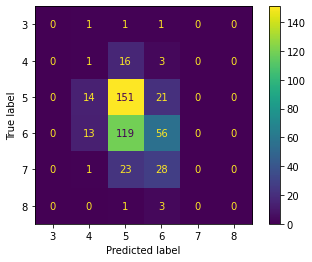

In [73]:
rf_cls.set_params(criterion = 'entropy', bootstrap = True, max_depth = 9, max_features = 'auto')
rf_cls.fit(x_train, y_train)
rf_y_predict = rf_cls.predict(x_test)

print(plot_confusion_matrix(rf_cls, X_test, y_test))


In [140]:
cr_rf = classification_report(y_test, rf_y_predict, labels=data['quality'].unique())
print(cr_rf)

              precision    recall  f1-score   support

           5       0.62      0.72      0.67       186
           6       0.56      0.61      0.58       188
           7       0.56      0.35      0.43        52
           4       0.00      0.00      0.00        20
           8       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

    accuracy                           0.58       453
   macro avg       0.29      0.28      0.28       453
weighted avg       0.55      0.58      0.56       453



#### Observations from Random Forest Model:
- In this case also, accuracy score is very low, but better that logistic regression and decision tree

# KNN MACHINE LEARNING MODEL

In [50]:
print(x_train.shape)   # Predictor variable used for training the model
print(y_train.shape)   # Target variable used for training the model
print(x_test.shape)    # Predictor variable used for testing the model
print(y_test.shape)    # Target variable used for testing the model

# All above datasets are without any scalar techniques

(906, 11)
(906, 1)
(453, 11)
(453, 1)


In [54]:
# Below is scaled data
print(X_train.shape)
print(X_test.shape)

(906, 11)
(453, 11)


#### Using KNN

Text(0, 0.5, 'Accuracy rate')

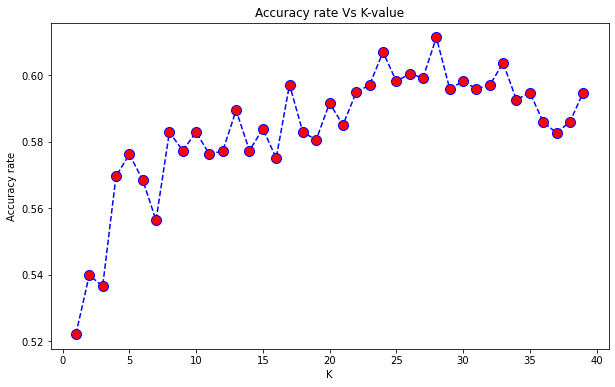

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
accuracy_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_train, y_train, cv=10)
    accuracy_rate.append(score.mean())

plt.figure(figsize = (10,6))
plt.plot(range(1,40), accuracy_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Accuracy rate Vs K-value')
plt.xlabel('K')
plt.ylabel('Accuracy rate')

#### Rational behind choosing K-value:
K-value will be chosen where we see maximum consistancy in accuracy and K-value associated with maximum accuarcy will be chosen. In above graph, cosistant accuracy is observed at K from 25-27 and 30-33. However max accuracy seeme to be for K=26. So K=26 tried and it provided overall accuaracy of 56%. K=27 also tried, but could not improve accuracy. For K=25, accuracy was 56% but recall was better for K=26 only. So decided to go ahead with K=26.

#### Fit model with selected K-value

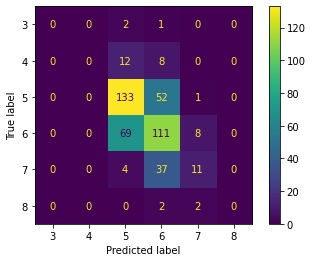

In [105]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train,y_train)
knn_y_predict = knn.predict(X_test)
print(plot_confusion_matrix(knn, X_test, y_test))

In [141]:
cr_knn = classification_report(y_test, knn_y_predict, labels=list(data['quality'].unique()))
print(cr_knn)

              precision    recall  f1-score   support

           5       0.60      0.72      0.66       186
           6       0.53      0.59      0.56       188
           7       0.50      0.21      0.30        52
           4       0.00      0.00      0.00        20
           8       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

    accuracy                           0.56       453
   macro avg       0.27      0.25      0.25       453
weighted avg       0.52      0.56      0.53       453



#### Observations from KNN Model:
- In this case also, accuracy score is very low, but better that logistic regression and decision tree, but lower than random forest model

# NAIVE BAYS MACHINE LEARNING MODEL
- Heat map and VIF shows that predictor variable have high correlation, so Naive Bays model will not be applicable, however for practicing model is used on the provided data

In [109]:
from sklearn.naive_bayes import GaussianNB  
# Imported Guassian classifier as most of the predictor variable in given dataset are numerical in nature

print(x_train.shape)   # Predictor variable used for training the model
print(y_train.shape)   # Target variable used for training the model
print(x_test.shape)    # Predictor variable used for testing the model
print(y_test.shape)    # Target variable used for testing the model

# All above datasets are without any scalar techniques


(906, 11)
(906, 1)
(453, 11)
(453, 1)


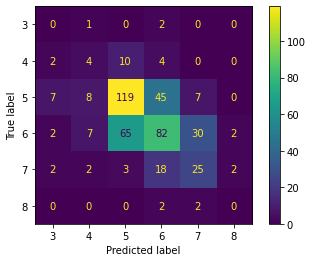

In [110]:
nb_cls = GaussianNB()
nb_cls.fit(x_train, y_train)
nb_y_predict = nb_cls.predict(x_test)
plot_confusion_matrix(nb_cls, x_test, y_test)

In [142]:
cr_nb = classification_report(y_test, nb_y_predict,labels = list(data['quality'].unique()))
print(cr_nb)

              precision    recall  f1-score   support

           5       0.60      0.64      0.62       186
           6       0.54      0.44      0.48       188
           7       0.39      0.48      0.43        52
           4       0.18      0.20      0.19        20
           8       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

    accuracy                           0.51       453
   macro avg       0.29      0.29      0.29       453
weighted avg       0.52      0.51      0.51       453



#### Observations of NaiveBays Model
- So far, amongst all the models, NaiveBays model provided the lowest overall accuracy. It was expected considering the fact of high muiticollinearity present between predictor variables.

# SUPPORT VECTOR MODEL

In [120]:
print(x_train.shape)   # Predictor variable used for training the model
print(y_train.shape)   # Target variable used for training the model
print(x_test.shape)    # Predictor variable used for testing the model
print(y_test.shape)    # Target variable used for testing the model

# All above datasets are without any scalar techniques

(906, 11)
(906, 1)
(453, 11)
(453, 1)


In [121]:
# Below is scaled data
print(X_train.shape)
print(X_test.shape)

(906, 11)
(453, 11)


#### Tuning of SVM hyperparameters

In [126]:
from sklearn.svm import SVC
svc = SVC(random_state=5)

from sklearn.model_selection import GridSearchCV
svc_param_dict = {'C': [1, 10, 100, 1000],
                  'gamma' : [0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['linear', 'poly', 'rbf']}
svc_gscv = GridSearchCV(svc, svc_param_dict, verbose = 5, n_jobs=-1, cv=5, scoring='accuracy')
svc_gscv.fit(X_train, y_train)
print(svc_gscv.best_params_)
                  

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


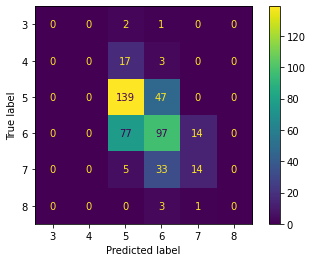

In [130]:
svc = SVC(C = 1, gamma = 0.1, kernel = 'rbf', random_state=5)
svc.fit(X_train, y_train)
svc_y_predict = svc.predict(X_test)
plot_confusion_matrix(svc, X_test, y_test)

In [144]:
cr_svc = classification_report(y_test, svc_y_predict, labels=data['quality'].unique())

In [145]:
print(cr_svc)

              precision    recall  f1-score   support

           5       0.58      0.75      0.65       186
           6       0.53      0.52      0.52       188
           7       0.48      0.27      0.35        52
           4       0.00      0.00      0.00        20
           8       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

    accuracy                           0.55       453
   macro avg       0.26      0.26      0.25       453
weighted avg       0.51      0.55      0.52       453



#### Observations from Support Vector Model
- In this model also, accuracy is very low

## ALL MODEL CLASSIFICATION REPORTS

In [155]:
print('LOGISTIC REGRESSION:', end = '\n\n')
print(cr_lr)
print('DECISION TRESS:', end = '\n\n')
print(cr_dt)
print('RANDOM FOREST:', end = '\n\n')
print(cr_rf)
print('KNN:', end = '\n\n')
print(cr_knn)
print('NAIVE BAYS:', end = '\n\n')
print(cr_nb)
print('SVC:', end = '\n\n')
print(cr_svc)

LOGISTIC REGRESSION:

              precision    recall  f1-score   support

           5       0.60      0.74      0.66       186
           6       0.52      0.49      0.50       188
           7       0.45      0.35      0.39        52
           4       0.00      0.00      0.00        20
           8       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

    accuracy                           0.55       453
   macro avg       0.26      0.26      0.26       453
weighted avg       0.51      0.55      0.53       453

DECISION TRESS:

              precision    recall  f1-score   support

           5       0.57      0.67      0.62       186
           6       0.54      0.55      0.54       188
           7       0.65      0.50      0.57        52
           4       0.00      0.00      0.00        20
           8       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

    accuracy                          

### CONCLUSION:
- None of of the model can prdict with higher accuaracy. Hence, for the given dataset, random forest model is recomended as it is giving higher accuarcy with good recall results compared to all other models.
- None of the models can predict worst wine quality (3) and best wine quality(8) correctly.